## 01. Import Libraries and Data

In [11]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 
import scipy
from scipy import stats

In [92]:
#import data

path = r'/Users/juliewhitton/Desktop/Personal Project/'

df = pd.read_csv(os.path.join(path, 'Data', 'Final Data', 'incidents_final.csv'), usecols = ['n_killed', 'n_injured',
                                                                                            'inc_rate'])
df.head()
                         

,n_killed,n_injured,inc_rate
0,0,0,14.572227
1,0,1,14.572227
2,2,2,14.572227
3,0,2,14.572227
4,0,1,14.572227


In [93]:
#standardize data

df = stats.zscore(df)
df.head()

,n_killed,n_injured,inc_rate
0,-0.484668,-0.683693,-0.488888
1,-0.484668,0.702701,-0.488888
2,3.377692,2.089096,-0.488888
3,-0.484668,2.089096,-0.488888
4,-0.484668,0.702701,-0.488888


In [76]:
df.isna().sum()

n_killed     0
n_injured    0
inc_rate     0
dtype: int64

In [77]:
#determine no of clusters

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [78]:
#create cluster scores

score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 
score

[-676790.9999999761,
 -483057.2427078487,
 -350333.70218979847,
 -225351.02895921236,
 -182615.87117098414,
 -153026.23828700694,
 -135388.2921635892,
 -117525.30896958105,
 -106864.09317703899]

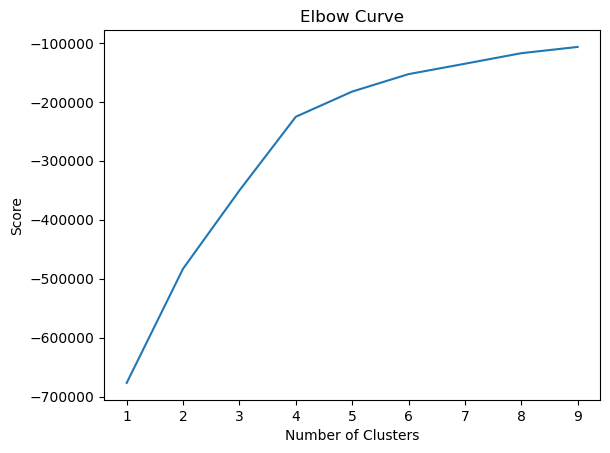

In [79]:
#create plot

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I chose 4 clusters as that is the point at which the steepness of the line decreases.

In [80]:
#assign no of clusters and apply algo

kmeans = KMeans(n_clusters = 4)
kmeans.fit(df)

KMeans(n_clusters=4)

In [81]:
#create cluster col 

df['clusters'] = kmeans.fit_predict(df)
df.head()

,n_killed,n_injured,inc_rate,clusters
0,-0.484668,-0.683693,-0.488888,2
1,-0.484668,0.702701,-0.488888,1
2,3.377692,2.089096,-0.488888,0
3,-0.484668,2.089096,-0.488888,1
4,-0.484668,0.702701,-0.488888,1


In [82]:
#check value counts

df['clusters'].value_counts()

2    89999
1    84897
0    48721
3     1980
Name: clusters, dtype: int64

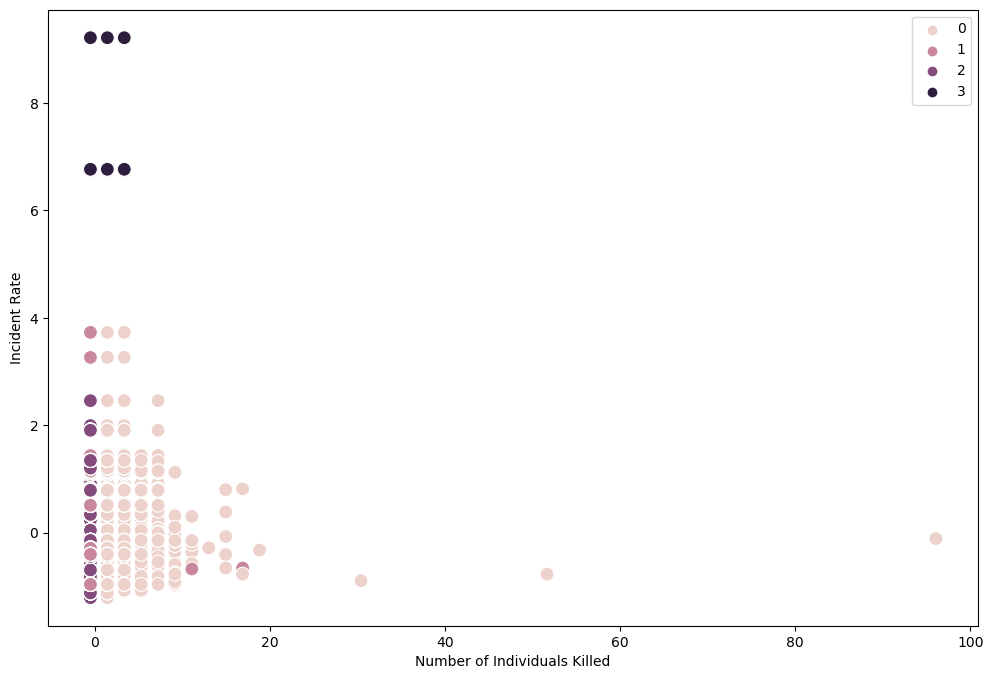

In [83]:
#create plot w/inc_rate and n_killed

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df['n_killed'], y = df['inc_rate'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Number of Individuals Killed') # Label x-axis.
plt.ylabel('Incident Rate') # Label y-axis.
plt.show()

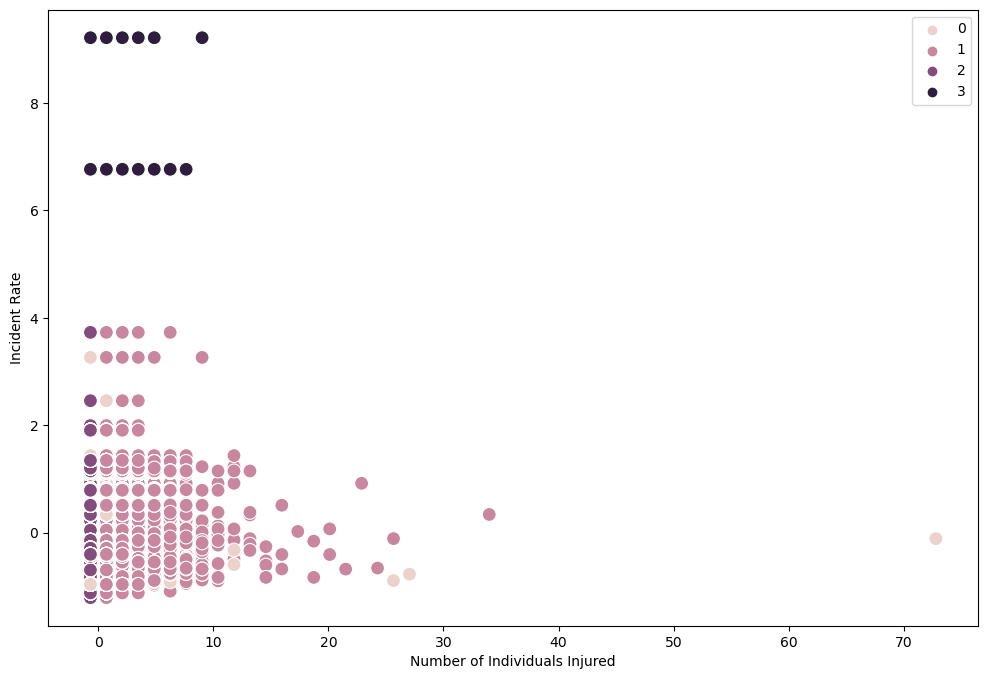

In [84]:
#create plot w/inc_rate and n_injured

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df['n_injured'], y = df['inc_rate'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Number of Individuals Injured') # Label x-axis.
plt.ylabel('Incident Rate') # Label y-axis.
plt.show()

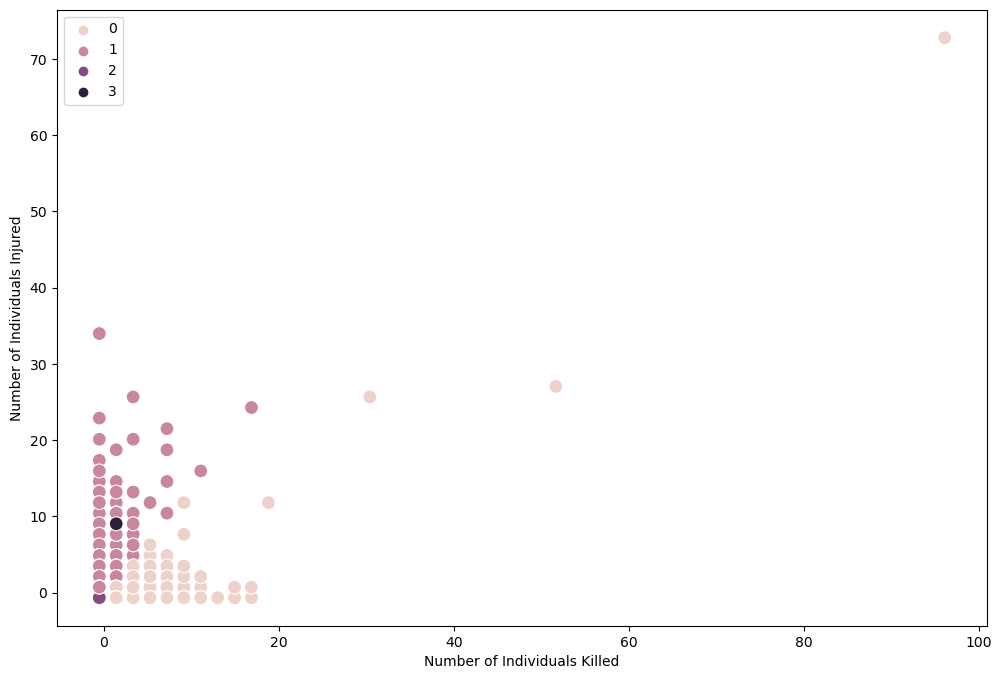

In [85]:
#create plot w/n_injured and n_killed

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df['n_killed'], y = df['n_injured'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Number of Individuals Killed') # Label x-axis.
plt.ylabel('Number of Individuals Injured') # Label y-axis.
plt.show()

I don't think I really understand how to draw any new conclusions from these scatterplots. I welcome any pointers and feedback!

In [86]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark blue'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [87]:
df_stats = df.groupby('cluster').agg({'n_killed':['mean', 'median'], 
                         'n_injured':['mean', 'median'], 
                         'inc_rate':['mean', 'median']})
df_stats

n_killed           n_injured            inc_rate          
                mean    median      mean    median      mean    median
cluster                                                               
dark blue  -0.297402 -0.484668 -0.236966 -0.683693  8.177357  9.214279
light pink  1.682514  1.446512 -0.493267 -0.683693 -0.117393 -0.192037
pink       -0.444837 -0.484668  1.013386  0.702701 -0.005734 -0.112618
purple     -0.484668 -0.484668 -0.683693 -0.683693 -0.110944 -0.159863

I believe there are too many 0 values in n_killed and n_injured to produce meaningful statistical insights. I will try removing rows in which both columns = 0.

In [135]:
#refresh df

df1 = pd.read_csv(os.path.join(path, 'Data', 'Final Data', 'incidents_final.csv'), usecols = ['n_killed', 'n_injured',
                                                                                            'inc_rate'])
df1.head()
        

,n_killed,n_injured,inc_rate
0,0,0,14.572227
1,0,1,14.572227
2,2,2,14.572227
3,0,2,14.572227
4,0,1,14.572227


In [136]:
#remove rows in which n_killed and n_injured are both = 0
df2 = df1[(df1['n_killed'] != 0) & (df1['n_injured'] != 0)].reset_index(drop = True)
df2.head()

,n_killed,n_injured,inc_rate
0,2,2,14.572227
1,1,2,14.572227
2,1,1,14.572227
3,1,1,14.572227
4,1,1,14.572227


In [137]:
df2.shape

(8019, 3)

In [149]:
#standardize data

df2 = stats.zscore(df2)
df2.head()

,n_killed,n_injured,inc_rate,clusters
0,1.071396,0.525695,-0.488744,-1.082943
1,-0.187620,0.525695,-0.488744,-1.082943
2,-0.187620,-0.338678,-0.488744,-1.082943
3,-0.187620,-0.338678,-0.488744,-1.082943
4,-0.187620,-0.338678,-0.488744,-1.082943


In [150]:
#determine no of clusters

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [151]:
#create cluster scores

score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] 
score

[-32075.999999999964,
 -24714.61784241676,
 -18519.909026445977,
 -14549.41509104975,
 -11930.802335101882,
 -9804.788953736941,
 -8076.507114780164,
 -7099.959310570641,
 -6103.830580008854]

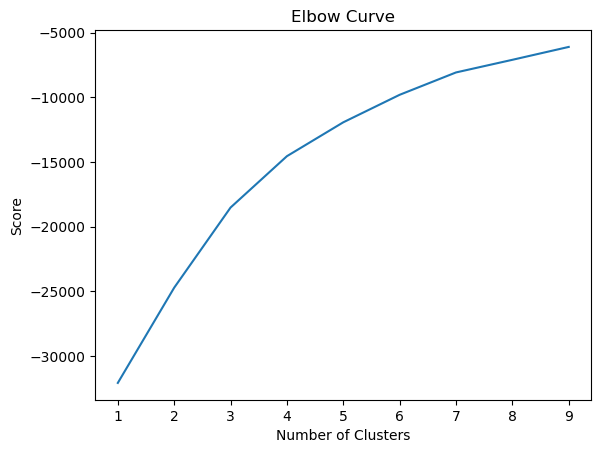

In [152]:
#create plot

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I chose 7 because the arc is pretty even but there is a very slight variation at 7.

In [153]:
#assign no of clusters and apply algo

kmeans = KMeans(n_clusters = 7)
kmeans.fit(df2)

KMeans(n_clusters=7)

In [154]:
df2['clusters'] = kmeans.fit_predict(df2)
df2.head()

,n_killed,n_injured,inc_rate,clusters
0,1.071396,0.525695,-0.488744,2
1,-0.187620,0.525695,-0.488744,2
2,-0.187620,-0.338678,-0.488744,2
3,-0.187620,-0.338678,-0.488744,2
4,-0.187620,-0.338678,-0.488744,2


In [155]:
#check value counts

df2['clusters'].value_counts()

1    4021
2    2868
0     864
6     227
5      30
3       8
4       1
Name: clusters, dtype: int64

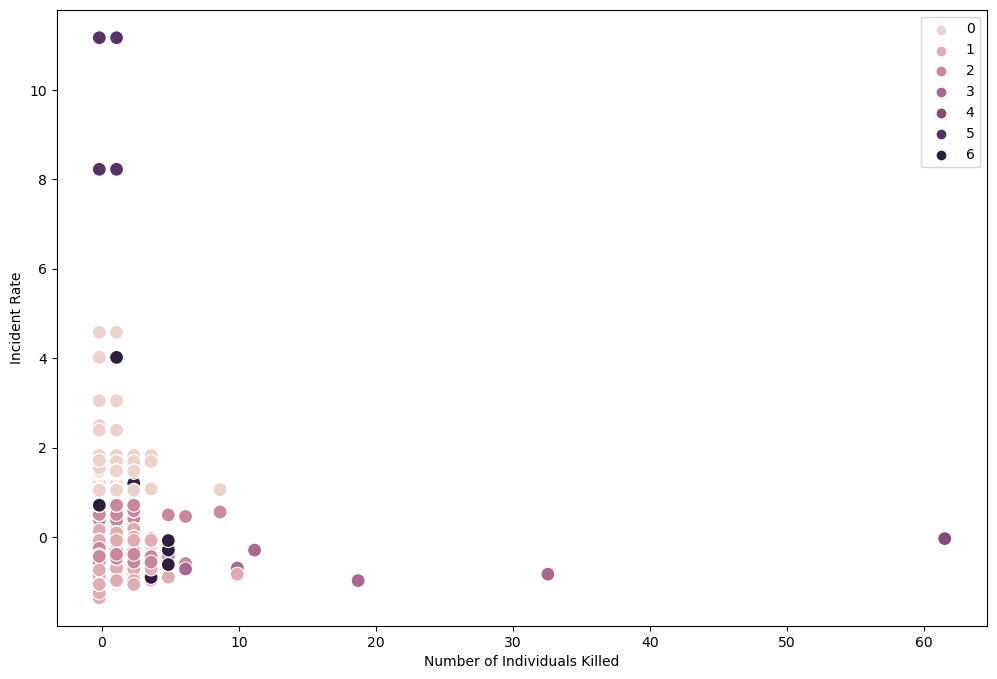

In [156]:
#plot n_killed v inc_rate

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df2['n_killed'], y = df2['inc_rate'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Number of Individuals Killed') # Label x-axis.
plt.ylabel('Incident Rate') # Label y-axis.
plt.show()

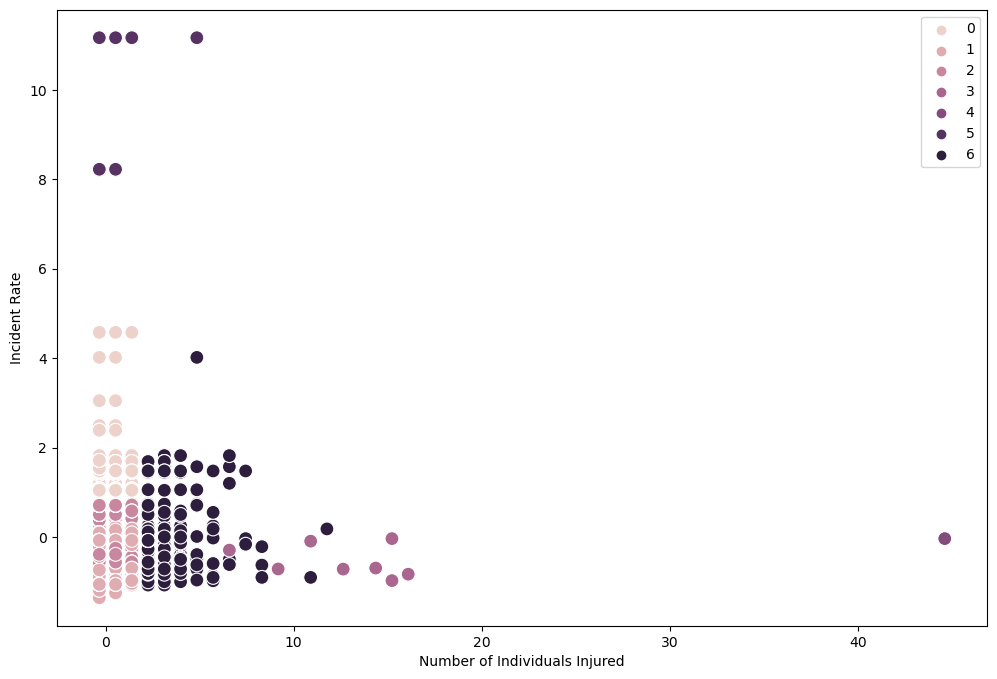

In [157]:
#plot n_injured v inc_rate

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df2['n_injured'], y = df2['inc_rate'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Number of Individuals Injured') # Label x-axis.
plt.ylabel('Incident Rate') # Label y-axis.
plt.show()

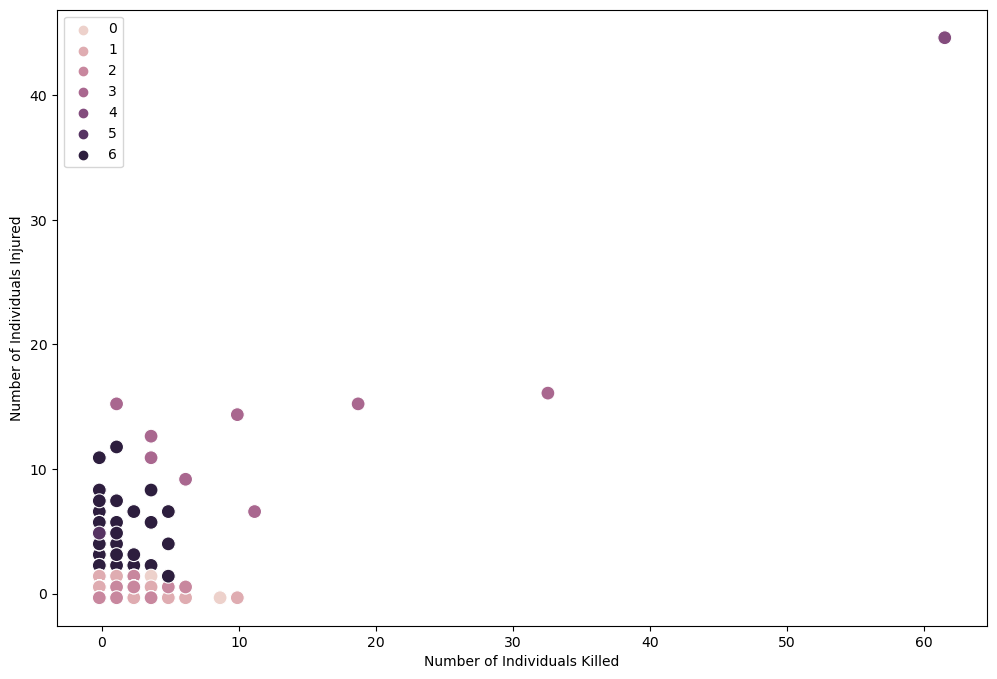

In [158]:
#create plot w/n_injured and n_killed

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df2['n_killed'], y = df2['n_injured'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Number of Individuals Killed') # Label x-axis.
plt.ylabel('Number of Individuals Injured') # Label y-axis.
plt.show()

In [159]:
df2_stats = df2.groupby('clusters').agg({'n_killed':['mean', 'median'], 
                         'n_injured':['mean', 'median'], 
                         'inc_rate':['mean', 'median']})
df2_stats

n_killed             n_injured              inc_rate           
               mean     median       mean     median       mean     median
clusters                                                                  
0         -0.040443  -0.187620  -0.123585  -0.338678   1.550732   1.445345
1         -0.020106  -0.187620  -0.109096  -0.338678  -0.354157  -0.162651
2         -0.030901  -0.187620  -0.118064  -0.338678  -0.084209  -0.300995
3         10.828769   7.995983  12.518879  13.491299  -0.545083  -0.705124
4         61.504158  61.504158  44.608749  44.608749  -0.036854  -0.036854
5         -0.103686  -0.187620   0.122321  -0.338678  10.674111  11.164510
6          0.261632  -0.187620   3.240666   2.254442   0.043703  -0.080042

Well, I am not sure that this did much good. I'm not sure I'm grasping the manner in which to interpret the results or if my data is just not well suited to this type of algorithm. 